# Compare slope of ideal experiment with calculated values for dissipation

In [1]:
import sys
sys.path.append("/home/149/ab8992/tasman-tides/")
import xarray as xr
import ttidelib as tt
import scipy
import cmocean
import os
from pathlib import Path
cmap = cmocean.cm.dense_r
import matplotlib
import matplotlib.pyplot as plt
earth_cmap = matplotlib.colormaps["gist_earth"]
from datetime import timedelta

# import filtering
import numpy as np
import dask
dask.config.set({'logging.distributed': 'error'})
from dask.distributed import Client,default_client
import xrft


client = tt.startdask()
client

<Client: 'tcp://127.0.0.1:46533' processes=7 threads=28, memory=112.00 GiB>


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 112.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46533,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 112.00 GiB
Comm: tcp://127.0.0.1:42343,Total threads: 4
Dashboard: /proxy/36085/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:36657,


## First draft a function to calculate N(z)

$ \large N = \frac{-g}{\rho}\frac{\partial \rho}{\partial z} $


In [44]:
trange = 50
to_process = {
    "ideal-20": {
        "data":tt.collect_data(
            exptname="ideal-20",
            rawdata = ["rho","u","v","ahh"],
            timerange = (1000 - trange,1000 + trange)
        ).sel(yb = slice(-50,50))
    },
}
to_process["ideal-20"]["data"] = to_process["ideal-20"]["data"].assign_coords(
    {"xb" : to_process["ideal-20"]["data"].xb * 1000,
     "yb" : to_process["ideal-20"]["data"].yb * 1000
})

loading rho...	done.
loading u...	done.
loading v...	done.
loading ahh...	done.


In [45]:
## Load in the eigenfunctions

efuncs = {}

# efuncs["full-20"] = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/full-20/VerticalEigenfunctions.nc").chunk({"zl":-1,"xb" : 50,"yb" : 50})
# efuncs["blank-20"] = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/blank-20/VerticalEigenfunctions.nc").chunk({"zl":-1,"xb" : 50,"yb" : 50})
# efuncs["smooth-20"] = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/smooth-20/VerticalEigenfunctions.nc").chunk({"zl":-1,"xb" : 50,"yb" : 50})
# efuncs["full-40"] = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/full-40/VerticalEigenfunctions.nc").chunk({"zl":-1,"xb" : 50,"yb" : 50})
efuncs["ideal-20"] = tt.ShootingVmodes(
    xr.merge(
        [
            to_process["ideal-20"]["data"].bathy.rename("H"),
            tt.getN(to_process["ideal-20"]["data"].rho).rename("N").mean("time")
        ]).sel(xb = slice(400000,405000),yb = slice(0,5000)).load().chunk({"xb":1,"yb":1})
)


In [46]:
# print("U20")
# to_process["full-20-1"]["U"]  = (efuncs["full-20"].U * to_process["full-20-1"]["data"].u).fillna(0).integrate("zl").load() 
# to_process["full-20-1"]["V"]  = (efuncs["full-20"].U * to_process["full-20-1"]["data"].v).fillna(0).integrate("zl").load() 
# to_process["full-20-2"]["U"]  = (efuncs["full-20"].U * to_process["full-20-2"]["data"].u).fillna(0).integrate("zl").load() 
# to_process["full-20-2"]["V"]  = (efuncs["full-20"].U * to_process["full-20-2"]["data"].v).fillna(0).integrate("zl").load() 
# to_process["full-20-3"]["U"]  = (efuncs["full-20"].U * to_process["full-20-3"]["data"].u).fillna(0).integrate("zl").load() 
# to_process["full-20-3"]["V"]  = (efuncs["full-20"].U * to_process["full-20-3"]["data"].v).fillna(0).integrate("zl").load() 

# print("U40")
# to_process["full-40"]["U"]  = (efuncs["full-40"].U * to_process["full-40"]["data"].u).fillna(0).integrate("zl").load() 
# to_process["full-40"]["V"]  = (efuncs["full-40"].U * to_process["full-40"]["data"].v).fillna(0).integrate("zl").load()
# to_process["full-40-2"]["U"]  = (efuncs["full-40"].U * to_process["full-40-2"]["data"].u).fillna(0).integrate("zl").load() 
# to_process["full-40-2"]["V"]  = (efuncs["full-40"].U * to_process["full-40-2"]["data"].v).fillna(0).integrate("zl").load()
to_process["ideal-20"]["U"] = (efuncs["ideal-20"].U.isel(xb = 0,yb = 0).drop(["xb","yb"]) * to_process["ideal-20"]["data"].u).fillna(0).integrate("zl").load() 
to_process["ideal-20"]["V"] = (efuncs["ideal-20"].U.isel(xb = 0,yb = 0).drop(["xb","yb"]) * to_process["ideal-20"]["data"].v).fillna(0).integrate("zl").load() 

# to_process["smooth-20"]["U"]  = (efuncs["smooth-20"].U * to_process["smooth-20"]["data"].u).fillna(0).integrate("zl").load() 
# to_process["smooth-20"]["V"]  = (efuncs["smooth-20"].U * to_process["smooth-20"]["data"].v).fillna(0).integrate("zl").load()
# to_process["blank-20"]["U"]  = (efuncs["blank-20"].U * to_process["blank-20"]["data"].u).fillna(0).integrate("zl").load() 
# to_process["blank-20"]["V"]  = (efuncs["blank-20"].U * to_process["blank-20"]["data"].v).fillna(0).integrate("zl").load()


/jobfs/124677384.gadi-pbs/ipykernel_16784/2099901540.py:14: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  to_process["ideal-20"]["U"] = (efuncs["ideal-20"].U.isel(xb = 0,yb = 0).drop(["xb","yb"]) * to_process["ideal-20"]["data"].u).fillna(0).integrate("zl").load()
/jobfs/124677384.gadi-pbs/ipykernel_16784/2099901540.py:15: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  to_process["ideal-20"]["V"] = (efuncs["ideal-20"].U.isel(xb = 0,yb = 0).drop(["xb","yb"]) * to_process["ideal-20"]["data"].v).fillna(0).integrate("zl").load()


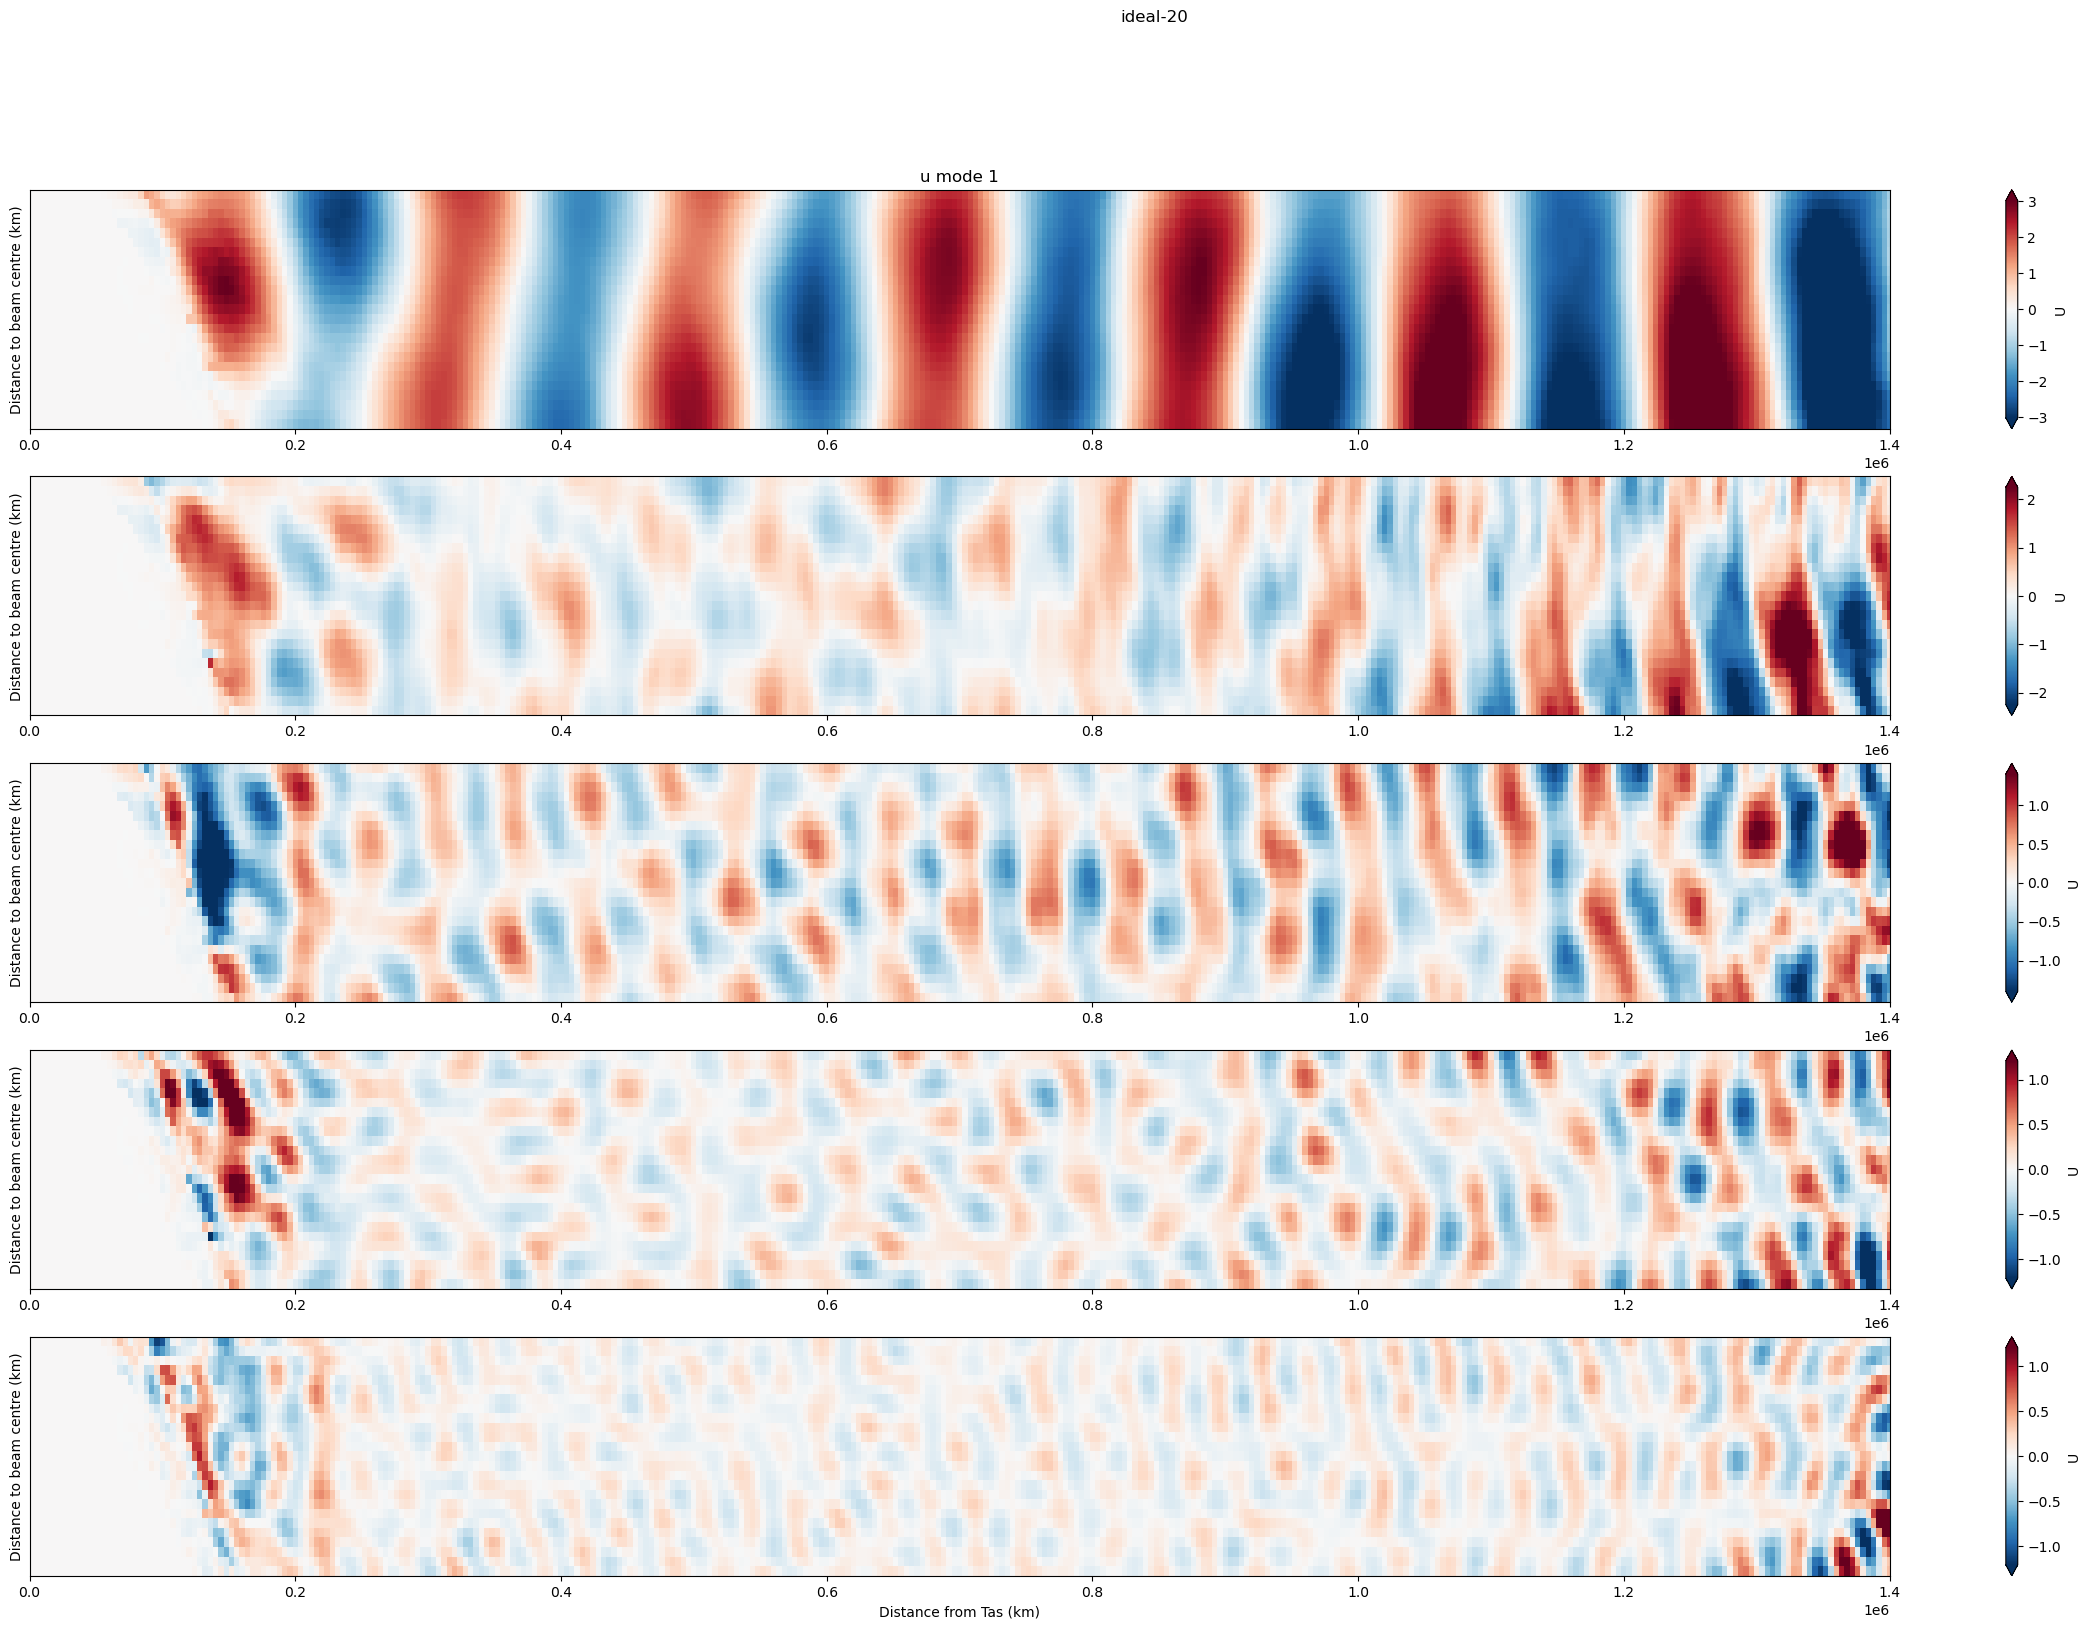

In [48]:
def PlotVmodes(data):
    fig,ax = plt.subplots(5,1,figsize = (30,18))

    for i in range(len(data.mode)):

        tp = data.U.isel(mode = i).sel(xb = slice(0,1400000))
        vm = 0.7 * np.max(np.abs(tp))
        tp.plot(ax = ax[i],vmin = -1 * vm,vmax = vm,cmap = "RdBu_r")

        tt.plot_topo(ax[i],bathy = data.bathy * -1)
        tt.plot_topo(ax[i],bathy = data.bathy * -1)
        ax[i].set_xlim(0,1400000)
        ax[i].set_xlim(0,1400000)
        ax[i].set_title("")
        ax[i].set_title("")
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
        ax[i].set_yticks([])
        ax[i].set_xlabel("")
        ax[i].set_ylabel("Distance to beam centre (km)")
        ax[i].set_aspect('auto')
        ax[i].set_aspect('auto')

    ax[-1].set_xlabel("Distance from Tas (km)")
    ax[-1].set_xlabel("Distance from Tas (km)")
    fig.subplots_adjust(wspace=0.01)
    ax[0].set_title("u mode 1")
    # ax[0].set_title("v mode 1")
    return fig
expt = "ideal-20"
vmodes = to_process[expt]["U"]
fig = PlotVmodes(xr.merge([vmodes.isel(time = 50).rename("U"),to_process[expt]["data"].bathy.rename("bathy")]))
fig.suptitle(expt)
fig.show()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/g/data/hh5/public/

Text(0.5, 1.0, 'Compare KE along beam:\n eddy vs no eddy')

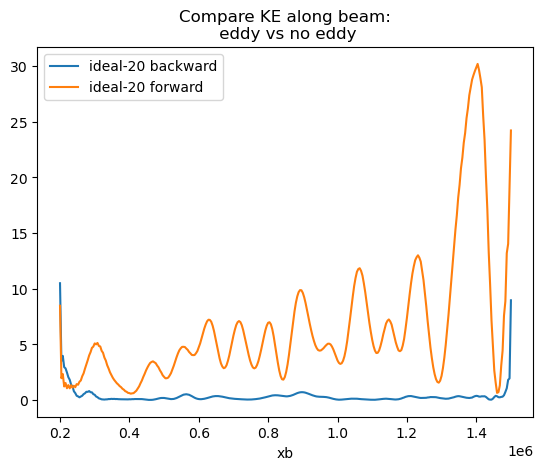

In [68]:
def DirectionalFilter(data):
    """
    Fourier filter into forward and backward propagating signals
    """
    import xrft
    FT = xrft.fft(
        data.drop_vars(['lon', 'lat']).sel(xb = slice(200000,None)),dim = ["time","xb"]
    ).load()

    ft = np.real(xrft.ifft(
        FT,dim = ["freq_time","freq_xb"]
    ))

    forward = np.real(xrft.ifft(
        FT.where((FT.freq_xb >= 0) & (FT.freq_time >= 0), 0) + FT.where((FT.freq_xb <= 0) & (FT.freq_time <= 0), 0) - FT.where((FT.freq_xb == 0) & (FT.freq_time == 0), 0),
        dim = ["freq_time","freq_xb"]
    ))

    backward = np.real(xrft.ifft(
        FT.where((FT.freq_xb <= 0) & (FT.freq_time >= 0), 0) + FT.where((FT.freq_xb >= 0) & (FT.freq_time <= 0), 0) - FT.where((FT.freq_xb == 0) & (FT.freq_time == 0), 0),
        dim = ["freq_time","freq_xb"]
    ))

    return xr.merge([forward.rename(f"{data.name}_forward"),backward.rename(f"{data.name}_backward")])

mode = 2
fig,ax = plt.subplots()
for expt in ["ideal-20"]:
    uFiltered = DirectionalFilter(to_process[expt]["U"].rename("u").cumsum("mode").isel(mode = mode))
    vFiltered = DirectionalFilter(to_process[expt]["V"].rename("v").cumsum("mode").isel(mode = mode))

    ke_forward = (uFiltered.u_forward**2 + vFiltered.v_forward**2).mean("time").sel(yb = 0,method = "nearest")
    ke_backward = (uFiltered.u_backward**2 + vFiltered.v_backward**2).mean("time").sel(yb = 0,method = "nearest")

    ke_backward.plot(ax = ax,label = f"{expt} backward")
    ke_forward.plot(ax = ax,label = f"{expt} forward")
    ax.legend()

ax.set_title("Compare KE along beam:\n eddy vs no eddy")

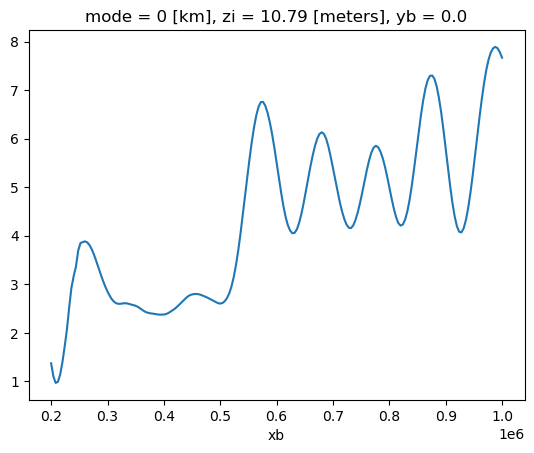

In [71]:
ke = (to_process[expt]["U"].rename("u")**2 + to_process[expt]["V"].rename("v")**2).mean("time").sel(yb = 0,method = "nearest").sel(xb = slice(200000,1000000))

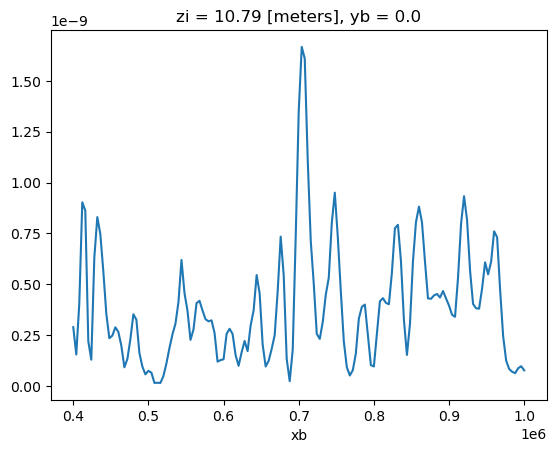

In [77]:
## Now calculate the dissipation rate in space
M2 = (28.984104 / 360) / (3600) 
M2 = 1 / M2# M2 period in seconds
# Calculate phase speed
phi = (efuncs[expt]["Wavelength"] * 1000/ M2).isel(xb = 0,yb = 0) # Phase speed in m/s



# D = to_process[expt]["data"]["ahh"] * (to_process[expt]["data"]["u"].differentiate("xb").differentiate("xb") + to_process[expt]["data"]["v"].differentiate("yb").differentiate("yb"))**2
# D = D.load()
D_slope = D / phi

mode = 1
(D_slope.sel(xb = slice(400000,1000000)).fillna(0).sel(zl = slice(0,50)).integrate("zl").sum("mode").mean("time").sel(yb = 0)).plot()
# ((ke.sel(xb = slice(400000,1000000)).differentiate("xb"))).sum("mode").plot()


In [65]:
to_process[expt]["data"]["u"].fillna(0).differentiate("xb").differentiate("xb").integrate("zl").mean("time").sel(yb = 0).values

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.30949175e-10,  4.80497824e-10,  4.52485327e-09,
        3.06803127e-09, -3.14363675e-09, -3.53664950e-09, -2.48159775e-09,
        2.78721198e-09,  1.31620204e-08,  7.74218202e-09,  1.77520660e-09,
        5.29526047e-08,  2.59589568e-07,  1.95750362e-07, -2.49232533e-07,
       -3.12341200e-07, -9.73484843e-08, -7.17722429e-09,  2.14256321e-08,
       -1.95196382e-08, -3.16466506e-08,  2.73614321e-08,  3.91827820e-08,
        2.22903045e-08,  3.94138464e-08,  2.45329783e-08, -4.99526350e-10,
       -1.32308736e-08, -2.40305378e-08,  4.97949204e-09,  4.85538926e-08,
        3.94258910e-08,  7.17527429e-09,  2.02975585e-08, -1.46707323e-08,
       -6.95874639e-08, -

In [66]:
to_process[expt]["data"]["ahh"].fillna(0).integrate("zl").mean("time").sel(yb = 0).values


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.00013469e+08,
       7.40361473e+08, 8.74948413e+08, 1.34907324e+09, 1.96985727e+09,
       2.26536336e+09, 2.55236709e+09, 3.22984639e+09, 3.64611316e+09,
       4.33339553e+09, 5.05574678e+09, 2.10441378e+10, 4.69235210e+10,
       3.78832891e+10, 3.39730542e+10, 3.36097547e+10, 3.16609616e+10,
       2.93166260e+10, 2.96276753e+10, 2.82689838e+10, 2.56496606e+10,
       2.40350835e+10, 2.10403854e+10, 1.98181773e+10, 1.96008292e+10,
       1.91875439e+10, 2.04649364e+10, 2.24408417e+10, 2.55312706e+10,
       2.71367119e+10, 2.61821400e+10, 2.54949786e+10, 2.07586242e+10,
       2.17933383e+10, 2.16883684e+10, 2.12952684e+10, 2.08935056e+10,
      

In [58]:
(efuncs[expt]["Wavelength"]).isel(xb = 0,yb = 0)

<xarray.DataArray 'Wavelength' (mode: 5)> Size: 40B
array([190.73514523,  87.10542858,  60.59438505,  46.18930608,
        37.27456142])
Coordinates:
    xb       float64 8B 4e+05
    yb       float64 8B 0.0
  * mode     (mode) int64 40B 0 1 2 3 4

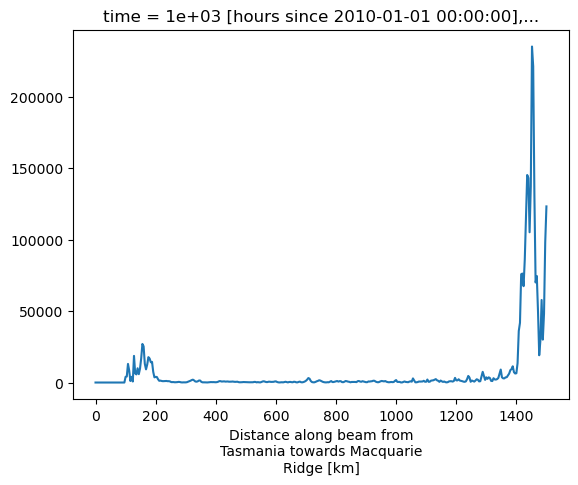

In [28]:
D.sel(yb = 0,method = "nearest").fillna(0).integrate("zl").isel(time = 50).plot()

In [24]:
efuncs[expt]["Wavelength"]

<xarray.DataArray 'Wavelength' (mode: 5, yb: 2, xb: 2)> Size: 160B
array([[[190.73514523, 190.73514523],
        [190.73514523, 190.73514523]],

       [[ 87.10542858,  87.10542858],
        [ 87.10542858,  87.10542858]],

       [[ 60.59438505,  60.59438505],
        [ 60.59438505,  60.59438505]],

       [[ 46.18930608,  46.18930608],
        [ 46.18930608,  46.18930608]],

       [[ 37.27456142,  37.27456142],
        [ 37.27456142,  37.27456142]]])
Coordinates:
  * xb       (xb) float64 16B 400.0 404.0
  * yb       (yb) float64 16B 0.0 4.0
  * mode     (mode) int64 40B 0 1 2 3 4